## Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Exploring data

### Read cleaned data from file

In [2]:
video_df = pd.read_csv("../data/processed/video_data_processed.csv")
video_df.head(10)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption
0,WkqM0ndr42c,Data School,My top 50 scikit-learn tips,If you already know the basics of scikit-learn...,python|data science|machine learning|scikit-learn,2023-04-20 14:56:43+00:00,8210.0,355.0,45.0,10051.0,hd,False
1,tWFQqaRtSQA,Data School,21 more pandas tricks,You're about to learn 21 tricks that will help...,python|pandas|data analysis|data science,2022-05-12 16:20:41+00:00,43576.0,1379.0,67.0,1480.0,hd,False
2,gd-TZut-oto,Data School,Adapt this pattern to solve many Machine Learn...,Here's a simple pattern that can be adapted to...,python|machine learning|scikit-learn|data science,2021-10-28 16:16:39+00:00,11707.0,435.0,16.0,469.0,hd,False
3,v2QpvCJ1ar8,Data School,Tune multiple models simultaneously with GridS...,You can tune 2+ models using the same grid sea...,python|machine learning|scikit-learn|data science,2021-10-26 13:53:24+00:00,6453.0,198.0,14.0,307.0,hd,False
4,sMlsd2CnIf4,Data School,Access part of a Pipeline using slicing,Want to operate on part of a Pipeline (instead...,python|machine learning|scikit-learn|data science,2021-10-21 14:49:56+00:00,2413.0,64.0,4.0,218.0,hd,False
5,fvY3InlnOh8,Data School,Tune the parameters of a VotingClassifer or Vo...,Want to improve the accuracy of your VotingCla...,python|machine learning|scikit-learn|data science,2021-10-19 13:49:42+00:00,4053.0,141.0,9.0,247.0,hd,False
6,2lq2k6J3GW4,Data School,Ensemble multiple models using VotingClassifer...,Want to improve your classifier's accuracy? Cr...,python|machine learning|scikit-learn|data science,2021-10-14 11:40:31+00:00,7261.0,243.0,18.0,272.0,hd,False
7,unP3rCfzROk,Data School,Create feature interactions using PolynomialFe...,"Want to include ""feature interactions"" in your...",python|machine learning|scikit-learn|data science,2021-10-12 15:26:05+00:00,5290.0,127.0,9.0,248.0,hd,False
8,QqFGKVieywY,Data School,Speed up GridSearchCV using parallel processing,Want your grid search to run faster? Set n_job...,python|machine learning|scikit-learn|data science,2021-10-07 13:19:28+00:00,4316.0,120.0,7.0,136.0,hd,False
9,n_x40CdPZss,Data School,Use OrdinalEncoder instead of OneHotEncoder wi...,"With a tree-based model, try OrdinalEncoder in...",python|machine learning|scikit-learn|data science,2021-10-05 16:25:13+00:00,3855.0,130.0,14.0,419.0,hd,False


In [3]:
video_df.shape

(60032, 12)

### Numerical analysis using descriptive statistics

In [4]:
video_df.describe()

,viewCount,likeCount,commentCount,duration
count,6.003200e+04,60032.00000,60032.000000,60032.000000
mean,4.848931e+04,1120.36274,69.066015,1496.953575
std,3.585073e+05,8272.34260,529.354710,2475.709199
min,0.000000e+00,0.00000,0.000000,0.000000
25%,6.220000e+02,11.00000,1.000000,293.000000
50%,3.059500e+03,55.00000,5.000000,695.000000
75%,1.601725e+04,332.00000,26.000000,1786.000000
max,3.447645e+07,571358.00000,60054.000000,92218.000000


### **Question 3:**  Is there a particular time of the day, day of the week, or month when videos tend to get more views or engagement?

### **Question 4:** How does caption affect views and interactions (likes, comments)?

**Answering this question will:** provides insights into how captions can impact video performance on the platform.

**How we answer this question:** we will use the columns viewCount, likeCount, commentCount, caption to calculate the correlation matrix

Step 1: Calculate the correlation matrix

In [14]:
correlation_matrix = video_df[['viewCount', 'likeCount', 'commentCount', 'caption']].corr()
correlation_matrix

,viewCount,likeCount,commentCount,caption
viewCount,1.000000,0.869915,0.723999,0.117834
likeCount,0.869915,1.000000,0.700103,0.128734
commentCount,0.723999,0.700103,1.000000,0.105745
caption,0.117834,0.128734,0.105745,1.000000


Step 2: Display the correlation matrix using a HeatMap chart

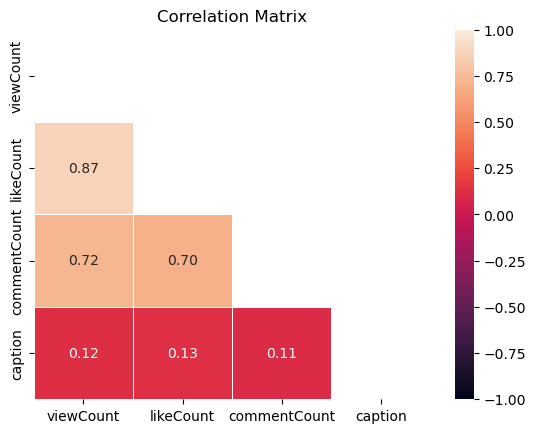

In [13]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

- `viewCount` and `caption`: The correlation coefficient is 0.12, which found a very low degree of compatibility between captions and views. Captions have no effect on views.
- `likeCount` and `caption`: The correlation coefficient is 0.13, similar to views, captions do not have a large impact on likes.
- `commentCount` and `caption`: The correlation coefficient is 0.105745, a low correlation level, showing that caption do not affect the number of comments much.
- Overall, it seems like captions don't have as much of an impact on views and engagement compared to other factors like likes and comments.